In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import requests

In [2]:
sess = tf.InteractiveSession()

In [3]:
from sklearn import datasets

In [4]:
iris = datasets.load_iris()

In [5]:
x = iris.data[:,3]
y = iris.data[:,2]

In [6]:
#split train and test datasets
train_indices = np.random.choice(len(x),size=round(len(x)*0.8),replace=False)
test_indices = np.array(list(set(range(len(x)))-set(train_indices)))
x_train = x[train_indices]
y_train = y[train_indices]
x_test = x[test_indices]
y_test = y[test_indices]

In [7]:
batch_size = 50
epochs = 200
epsilon = 0.8

In [8]:
x_input = tf.placeholder(tf.float32,[None,1])
y_target = tf.placeholder(tf.float32,[None,1])
w = tf.Variable(tf.random_normal([1,1],stddev=0.05))
b = tf.Variable(tf.random_normal([1,1],stddev=0.05))

In [9]:
model_output = tf.add(tf.matmul(x_input,w),b)

In [10]:
loss = tf.reduce_mean(tf.maximum(0.0,tf.subtract(tf.abs(tf.subtract(model_output,y_target)),epsilon)))

In [11]:
optimizer = tf.train.GradientDescentOptimizer(0.015).minimize(loss)

In [12]:
tf.global_variables_initializer().run()
train_loss = []
test_loss = []
for i in range(1,epochs+1):
    rand_index = np.random.choice(len(x_train),size=batch_size)
    x_batch = x_train[rand_index][:,np.newaxis]
    y_batch = y_train[rand_index][:,np.newaxis]
    optimizer.run(feed_dict={x_input:x_batch,y_target:y_batch})
    temp_train_loss = loss.eval(feed_dict={x_input:x_train[:,np.newaxis],y_target:y_train[:,np.newaxis]})
    train_loss.append(temp_train_loss)
    temp_test_loss = loss.eval(feed_dict={x_input:x_test[:,np.newaxis],y_target:y_test[:,np.newaxis]})
    test_loss.append(temp_test_loss)
    
    if i % 50 == 0:
        print('train loss is : {:.4f},test loss is {:.4f}'.format(temp_train_loss,temp_test_loss))

train loss is : 1.2368,test loss is 1.1252
train loss is : 0.1443,test loss is 0.0920
train loss is : 0.0387,test loss is 0.0280
train loss is : 0.0203,test loss is 0.0272


In [13]:
slope = w.eval()[0][0]
intercept = b.eval()[0][0]

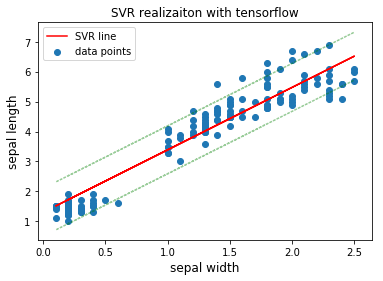

In [14]:
fit_values = []
for i in x:
    fit_values.append(slope*i+intercept)
plt.plot(x,fit_values,color='red',label='SVR line')
plt.plot(x,np.array(fit_values)+epsilon,linestyle=':',color='g',alpha=0.4)
plt.plot(x,np.array(fit_values)-epsilon,linestyle=':',color='g',alpha=0.4)
# plt.fill_between(x,np.array(fit_values)+epsilon,np.array(fit_values)-epsilon,color='g',alpha=0.1)
plt.scatter(x,y,label='data points')
plt.xlabel('sepal width',size=12)
plt.ylabel('sepal length',size=12)
plt.title('SVR realizaiton with tensorflow')
plt.legend(loc='best')
plt.show()

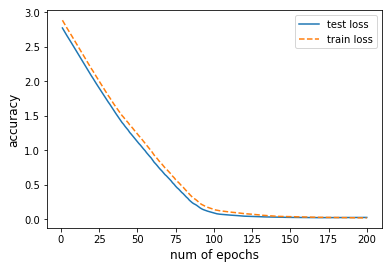

In [15]:
plt.plot(range(1,epochs+1),test_loss,label='test loss')
plt.plot(range(1,epochs+1),train_loss,label='train loss',linestyle='--')
plt.xlabel('num of epochs',size=12)
plt.ylabel('accuracy',size=12)
plt.legend()
plt.show()

In [16]:
import os

In [18]:
os.getcwd()

'D:\\git_repository\\tensorflow_studying'